# Importing the libraries required

In [ ]:
import os         # Library which facilitates working with directories and files
import cv2        #importing open source computer vision library   
import glob       # Used to retrieve files/pathnames matching a specified pattern.
import matplotlib.pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations in Python
import matplotlib.image as mpimg # To display images using matplotlib
#plots and or graphs will be displayed just below the cell where plotting commands are written.
%matplotlib inline

# To display custom image of choice


In [ ]:

image = mpimg.imread('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg')
plt.imshow(image,cmap="gray") #cmap stands for colormap default cmap value is 'viridis'
 

# Finding number of images present in each folder of dataset


In [ ]:
dataset_path = '../input/chest-xray-pneumonia//chest_xray/chest_xray/'

for i in ['train', 'val', 'test']:
    normal_img = len(os.listdir(dataset_path + i + '/NORMAL'))  # Returns a 'list' containing the names of the entries in the directory given by path
    # len() function returns the number of items in an object.
    pneumonia_img = len(os.listdir(dataset_path + i + '/PNEUMONIA'))
    print("Set: {}, normal images: {}, pneumonia images: {}".format(i, normal_img,pneumonia_img)) #formatted output

# Retrieving all the normal X-Ray and infected X-Ray images from the dataset

In [ ]:
# Seggregation of data
sets = ["train", "test", "val"]
#list declaration to store all the normal images in it
totalPneumoniaImg = []  
#list declaration to store all the pneumonia images in it
totalNormalImg = []

for i in sets:
    path = os.path.join(dataset_path, i)  # Combines path names into one complete path
    # here glob is written twice bcs the both the name of library and fuction is glob
    # '*' in pathname is called wildcard the usage of which here means that 'get all the files with extension ".jpeg" in the folder 'NORMAL'
    normal = glob.glob(os.path.join(path, "NORMAL/*.jpeg")) # used to retrieve files/pathnames
    pneumonia = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    totalNormalImg .extend(normal)           #concatenates one list with another whereas .append adds just one element
    totalPneumoniaImg.extend(pneumonia)
    

# Visualizing data using pie chart    
label= ['Nomal X-Ray images', 'Pneumonia X-Ray images']
targets = [len(totalNormalImg), len(totalPneumoniaImg)] #data for pie chart
chart_color=["white","orange"]  # color specs for pie chart
plt.figure(figsize=(15, 9))
#autopct helps to diplay the amount of data interms of percentage
plt.pie(x=targets, labels=label, autopct="%.1f%%",shadow = True,colors=chart_color) 
plt.legend(title = "Categories:")
plt.title(" Dataset visualization")

# Displaying the seggregated data counts
Total_images=totalPneumoniaImg+totalNormalImg  
print("Total Pneumonia Images: {}".format(len(totalPneumoniaImg))) #formatted output
print("Total Normal Images: {}".format(len(totalNormalImg)))
print("Total Images: {}".format(len(Total_images)))

# Displaying first few normal and pneumonia images

In [ ]:
columns = 3
rows = 2
# Parameters in figsize are width, height in inches.
# dpi tells about the resolution of images which tells how many pixels are displayed per inch of the image (PPI)
fig=plt.figure(figsize=(15, 12),dpi=180)  #Used to create a new figure
plt.title("Normal X-Ray images")
for i in range(1, columns*rows +1):        
    image = cv2.imread(totalNormalImg[i],0)
    imgage = cv2.resize(image, (256, 256)) #Aspect ratio of image is set here so that all images appear to be of same dimensions
    fig.add_subplot(rows, columns, i) #creates axis based on rows and columns and add plot to each division
    plt.imshow(image,cmap='gray') 
    

fig1=plt.figure(figsize=(15, 12),dpi=180)
plt.title("Pneumonia X-Ray images")
for i in range(1, columns*rows +1): 
    image = cv2.imread(totalPneumoniaImg[i])  # No aspect ratio set here                                        
    fig1.add_subplot(rows, columns, i)
    plt.imshow(image,cmap='gray')

-------------------------------

# Image Preprocessing section

-------------------------------


**Applying Canny-Edge detection and CLAHE method   on custom image X-Ray for the sake of better diagnosis**

# Image input block

In [ ]:
custom_image="../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0015-0001.jpeg"
input_image= cv2.imread(custom_image)

# Canny edge detection

In [ ]:
fig = plt.figure(figsize=(15, 12),dpi=180)
columns = 2; rows = 1
fig.add_subplot(rows, columns, 1)

res_image = cv2.resize(input_image, (512, 356)) # Changing image resolution
# Canny edge detection works on gray scale images only
edges = cv2.Canny(res_image, 80, 100)          # threshold values for canny edge detection (upper, lower)
plt.title("Processed X-Ray image")
plt.imshow(edges,cmap="gray")
plt.axis(False)

# For orignial image

fig.add_subplot(rows, columns, 2)
plt.title("Original X-Ray")
image = cv2.imread(custom_image,0)
plt.imshow(res_image,cmap="gray")
plt.axis(False)

# Contrast Limited Adaptive Histogram Equalization(CLAHE) method  

In [ ]:
fig=plt.figure(figsize=(15, 12),dpi=180)
columns = 2; rows = 1
''' generally clipLimit of 2-3 is used to get the maximum value of any element in the histogram is limited, and 
        therefore,the maximum slope (i.e. change in intensity) between any two adjacent elements in the histogram 
        is limited.
        tileGridSize refers to Size of grid for histogram equalization,This sets the number of tiles in the row and column. 
        By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.'''

fig.add_subplot(rows, columns, 1)
plt.title("processed X-Ray")
image = cv2.imread(custom_image,0)

clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8)) 
cl_img = clahe.apply(image)
plt.imshow(cl_img,cmap='gray')

fig.add_subplot(rows, columns, 2)
plt.title("Original X-Ray")
image = cv2.imread(custom_image)
plt.imshow(image,cmap="gray")

# Image data augmentation to expand the dataset virtually

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #image data generator.
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array #Keras API to convert images to Numpy Array
from PIL import Image   #Python Imaging Library which provides the python interpreter with image editing capabilities
image = Image.open(custom_image)
data = img_to_array(image)
samples = expand_dims(data, 0)

# Function to display the output of 'image_datagenerator'

In [ ]:
def image_augmentation(image,data_generated):
    
    """ image is converted to numpy array.For grayscale image the array will just have the width and height of image
     for colored image it will have width, height and no of channels). Here the Image Size consists of the width and 
     height of an image.It is converted so that model can 
     learn from that image
    """

    data = img_to_array(image)  
    """
    The extra dimension at the beginning of images are generally for batch sizes. 
    Batch size represent how many images you bundle to feed the CNN at once. The batch can also be a single image,
    however it still needs that extra dimension of 1 to show the size of batch. If for example batch size is 5, your
    input array would be of shape (5, 150, 150, 3)
    """

    samples = expand_dims(data, 0)   #Expand the shape of an array.
    it = data_generated.flow(samples, batch_size=1)#Iterator to return a batch(one image here) of augmented images for each iteration
    fig=plt.figure(figsize=(15, 12),dpi=180)
    columns = 3; rows = 3
    for i in range(1,columns*rows+1):
        fig.add_subplot(rows, columns, i)
        batch = it.next()                  #returns next element of the iterator
        result = batch[0].astype('uint8')  # To avoid the error 'TypeError:Invalid shape (1, 944, 1336, 1) for image data'
        plt.imshow(result,cmap='gray')
 

# Image rotation

In [ ]:
data_generated = ImageDataGenerator(rotation_range=12)  #'rotation_range=12' means randomly rotate between [-12,].
# allows the model to become invariant to the orientation of the object.
image_augmentation(image,data_generated)     #Function call

# Translation

In [ ]:
data_generated = ImageDataGenerator(height_shift_range=0.2) #means shift the image along Y-axis by + and-20%
image_augmentation(image,data_generated)     #Function call

In [ ]:
data_generated = ImageDataGenerator(width_shift_range=0.13) #means shift the image along X-axis by + and -13%
image_augmentation(image,data_generated)     #Function call

# Color space 

In [ ]:
"""
In Keras, 1.0 is the neutral brightness. If you go down to 1 it will start darkening the image. 
And if you go above to 1 ( value) it will start brightening the image.
"""
data_generated = ImageDataGenerator(brightness_range=[1,1.4]) 
image_augmentation(image,data_generated)     #Function call

# Zooming

In [ ]:
"""
randomly zooms in on the image or zooms out of the image. we can make a list with two values 
specifying the lower and the upper limit. if you specify a float value, then zoom will be done in the range 
[1-zoom_range,1+zoom_range]. Any value smaller than 1 will zoom in on the image. Whereas any value greater 
than 1 will zoom out on the image.
"""
data_generated = ImageDataGenerator(zoom_range=[.85,1.5]) #  (for negative zoom range'[-1,0]'' images will be flipped vertically)
image_augmentation(image,data_generated)     #Function call

# Rescaling or Pixel normalization(min-max normalization)

In [ ]:
"""
to obtain discriminative internal features that can lead
to excellent performance, we adopt an image preprocessing
method to reduce variance of images and enhance inherent
characteristics of images.
                                          -iEEE
"""

# This function reduces the range of pixel value from 0-255 to 0-1 as the dnns find complex to work on high numeric
# values of channeled color images also it leads to faster convergence.
data_generated = ImageDataGenerator(rescale=1./255) #to train the model faster and to make all the images 
#participate equally in the training as all the pixel values will be reduced to 0 or 1.
image_augmentation(image,data_generated)     #Function call

# Flipping the image (only horizontal flip bcs heart postion varies if position in which xray was taken)

In [ ]:
data_generated = ImageDataGenerator(horizontal_flip=True,vertical_flip=False)
image_augmentation(image,data_generated)     #Function call

# All the preprocessing simulataneously applied


In [ ]:
data_generated = ImageDataGenerator (rescale=1./255,vertical_flip=True,zoom_range=0.3)
image_augmentation(image,data_generated)   #Function call

# image preprocessing complete
-------------------------------------------------------------------------------------------------------------------------

# -----------------------Model building begins-----------------------

# This block is used to feed augmented images from dataset to the model

In [ ]:
image_dimensions = 150
batchSize = 64
number_of_epochs=10

training_data = data_generated.flow_from_directory(
    directory=dataset_path+'train', 
    target_size=(image_dimensions, image_dimensions), # default value
    batch_size=batchSize, 
    class_mode='binary', #Determines the type of arrays that are returned, for binary its 1-D array
    shuffle=True)   
"""
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.3,width_shift_range=0.3,height_shift_range=0.3)
train_gen = train_datagen.flow_from_directory(
directory=dataset_path+'train', 
 target_size=(image_dimensions, image_dimensions), # default value
batch_size=batchSize, 
class_mode='binary', #Determines the type of arrays that are returned, for binary its 1-D array
shuffle=True)
"""
generated_data_test = ImageDataGenerator(rescale=1./255)
testing_data = generated_data_test.flow_from_directory(
    directory=dataset_path+'test', 
    target_size=(image_dimensions, image_dimensions), # default value
    batch_size=batchSize, 
    class_mode='binary', #Determines the type of arrays that are returned, for binary its 1-D array
    shuffle=True)

# Layers in a convolutional neural network is shown below
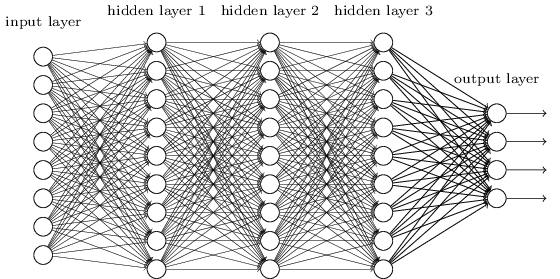

The input layers consists of convolutional layers, pooling layers, normalization layers and flatten layers
where 
convoultional layers with the help of kernals extract features present and 

pooling layers reduces the dimension of the data extracted so that only essential data can be propagated and

normalization layers(batch normalization) reduce the range of data values and

flattening layer convert the data to one dimensioal array

The hidden layer consists of Dense layers which is also called as fully connected layers which is simply, feed forward neural networks. Fully Connected Layers form the last few layers in the network.
The input to this is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.
"A fully connected layer is essential for a CNN, i.e., convolutional neural network, which has been shown to be successful in classifying images in several related applications. "
 -ieee
 
 output layer is the final layer in cnn which gives the desired results based on the activation function used. This layer is also comprised of fully connectecd layers

In [ ]:
from keras.models import Model,load_model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
#input function is used to instantiate a tensor object where tensors are simply mathematical objects that can be used to describe physical properties, just like scalars and vectors
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizer_v2.adam import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# input layer building begins


In [ ]:
input_data = Input(shape=(image_dimensions, image_dimensions, 3)) 
#here shape of the input image is defined along with the number of channels as '1' as input is a gray scale image

# First convolution block
layer_input = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(input_data)
#filters are the kernals which performs convolution operation on the image to get the feature map
#The feature maps of a CNN capture the result of applying the filters to an input image. I.e at each layer, 
#the feature map is the output of that layer. 
#The reason for visualising a feature map for a specific input image is to try to gain some understanding of what 
#features our CNN detects.

#kernal size defines the matrix dimensions 
#activation funciton decides the output from the neuron depending on the type of choosen function 
#In this we chose 'ReLU' which is a non linear activation funciton reason being 
""" In the experiments it is shown that ReLU is the most succesfull AF in general purposes.     
                                                                                  -ieee
"""

"""
A linear activation function lacks in performing backpropagation. Thus, it is not recommended to be used in a neural
network. While a model may perform a task even without the presence of an activation function in a linear manner, 
it would lack efficiency and accuracy. The significance of the activation function lies in making a given model learn 
and execute difficult tasks. Further, a non-linear activation function allows the stacking of multiple
layers of neurons to create a deep neural network, which is required to learn complex data sets with high accuracy.
"""

#Padding decides whether to append some zeroes from the outer edge of the image in order for the kernal to fit properly
#setting its value as same provides permission to append zeroes and by this the information present near the corners of the
#image wont be lost.
layer_input = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = MaxPool2D(pool_size=(2, 2), padding='same')(layer_input)
# MaxPool2d() helps in pooling of data, pool_size defines the size of the kernal here it is 2x2 matrix.

# Second convolution block
layer_input = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input= BatchNormalization()(layer_input)
#Batchnormalization helps in preventing the problem of exploding gradients along with overfitting as it reduces limits
#the range of data
"""
It is shown that Batch
Normalization is not only important in improving the
performance of the neural networks, but are essential for being
able to train a deep convolutional networks.
                                                    -ieee
"""
layer_input = MaxPool2D(pool_size=(2, 2), padding='same' )(layer_input)

# Third convolution block
layer_input = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = BatchNormalization()(layer_input)
layer_input = MaxPool2D(pool_size=(2, 2), padding='same' )(layer_input)

# Fourth convolution block
layer_input= SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input= SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = BatchNormalization()(layer_input)
layer_input = MaxPool2D(pool_size=(2, 2), padding='same')(layer_input)
layer_input = Dropout(rate=0.2)(layer_input)
# "Dropout is a simple and efficient way to prevent overfitting" --ieee
"""
Based on the presented results and
by interpreting the them, it can be seen that the best accuracies
are obtained when the dropout rate is greater than 0.5 and even
0.6 in the case of the CIFAR-10 datase
                                                                    -ieee
"""
#Most of the ieee papers use cifar dataset for their proof in ML
"""
The dataset is commonly used in Deep Learning for testing models of Image Classification. It has 60,000 color
images comprising of 10 different classes. The image size is 32x32 and
the dataset has 50,000 training images and 10,000 test images.
"""

"""
separableconn2d :Separable convolutions consist of first performing a depthwise spatial
convolution (which acts on each input channel separately) followed by a pointwise convolution which mixes
the resulting output channels. 

"However, deploying CNN on mobile devices demands low power, application specific computing platforms 
 like Field-Programmable Gate Array (FPGA) and Application-Specific Integrated Circuit (ASIC) which can work 
 as computation accelerator units. Moreover, using certain algorithmic optimizations like using Depthwise
 Separable Convolution instead of standard convolution, significantly reduces the computational burden of CNN inference."
                                                                                                                --ieee
"""
# Fifth conv block
layer_input = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(layer_input)
layer_input = BatchNormalization()(layer_input)
layer_input = MaxPool2D(pool_size=(2, 2), padding='same')(layer_input)
layer_input = Dropout(rate=0.2)(layer_input)
layer_input = Flatten()(layer_input)  

#Building of fully connected layers begins

layer_input = Dense(units=512, activation='relu')(layer_input)  #Units are the number of neurons contained in each layer
layer_input = Dropout(rate=0.7)(layer_input)
layer_input = Dense(units=128,activation='relu')(layer_input)
layer_input = Dropout(rate=0.5)(layer_input)
layer_input = Dense(units=64,activation='relu')(layer_input)
layer_input = Dropout(rate=0.3)(layer_input)
# "Flatten layer convert every array into one dimensional array" --article from National institute of health
# this layer is important as fully connected layer accepts only 1D data

# Callbacks implementation to prevent overfitting

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')


# Building of output layer begins

In [ ]:
# Output layer
output = Dense(units=1, activation='sigmoid')(layer_input)
#Activation function is Sigmoid as this is a binary classification problem
"""
Binary classification is the simplest kind of machine learning problem. 
The goal of binary classification is to categorise data points into one of two buckets: 0 or 1, true or false,
"""

# Built layers are integrated to form a model

In [ ]:
# Creating model and compiling
model = Model(inputs=input_data, outputs=output) #Model groups layers into an object with training and
#inference(gives information about the model) features.
#input layer and output layer is specified in the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Optimizers are algorithms or methods used to minimize an error function(loss function)or to maximize the efficiency of
#production
"""
  regarding optimizer:
 "The Adam optimizer had the best accuracy of 99.2% in enhancing the CNN ability in classification and segmentation."--article from National institute of health
"""

"""
regarding loss=binary_crossentropy:
 loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater.
  this cross-entropy loss is used for binary (0 or 1) classification applications.where Cross entropy is a measure of the entropy difference between two probability distributions
  where entropy the measure of uncertainity and probability distribution is a statistical function that describes possible values and likelihoods that a random variable can take within a given range.
"""

"""
Regarding metrics=['accuracy']
A metric is a function that is used to judge the performance of your model.
setting the value as equal to accuracy, Calculates how often predictions equal labels.
"""

# Getting summary of the model built

In [ ]:
model.summary()

# Model training begins

In [ ]:
#some previous code blocks needs to be added from the main code

hist = model.fit_generator(
          training_data, steps_per_epoch=training_data.samples // batchSize, 
           epochs=number_of_epochs, validation_data=testing_data, validation_steps=testing_data.samples // batchSize,callbacks=[checkpoint, lr_reduce]))

#train gen is the input data for training and steps per epoch is calculated by dividing total number of concerned data
#by the batch size
#number_of_epochs indicate the number of times the neural network is going to be trained with all the training data

# plotting training accuracy vs validation accuracy


In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.plot(hist.history['accuracy'], label="Train Accuracy")
plt.plot(hist.history['val_accuracy'], label="Valid Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over the Epochs")
plt.show()

# Model evaluation begins

creating test data for use in prediction


In [ ]:
import numpy as np
test_data = []    #list declaration
test_labels = []
for i in ['/NORMAL/', '/PNEUMONIA/']:
        for imag in (os.listdir(dataset_path + 'test' + i)):   #img runs through the list of images returned by os.listdir
            imag = plt.imread(dataset_path+'test'+i+imag) # an image is read
            imag = cv2.resize(imag, (image_dimensions, image_dimensions)) #resizing the image
            imag = np.dstack([imag, imag, imag])   #stacks the array in sequence
            imag = imag.astype('float32') / 255  #images are normalized
            #Since the desired normalized values are floats, they need to have floating-point dtype before the division 
            #is performed on them as '/' performs integer division if both numerator and denominator are specified as 
            #integer data type 
            # images are converted to floating-point elements with one digit after decimal point(due to use of float32) in range [0,1]
            if i =='/NORMAL/':
                label = 0
            elif i =='/PNEUMONIA/':
                label = 1            #Pneumonia is been labelled as 1 because we are detecting its presence in this program
            test_data.append(imag)
            test_labels.append(label)
    #normalized images are converted to array data 
test_data = np.array(test_data) 
test_labels = np.array(test_labels)

In [ ]:
predicted_data = model.predict(test_data)
#enables us to predict the labels of the data values on the basis of the trained model
#This method accepts one argument(preferably numpy array as NumPy arrays are faster and more compact than Python lists.
#An array consumes less memory and is convenient to use.), the new data X_new (e.g. model. predict(X_new) ),
#and returns the learned label for each object in the array.
#from this we get output as an array of 0s and 1s

accuracy = accuracy_score(test_labels, np.round(predicted_data))*100 #predicted values are rounded off to prevent any junk decimal values
confusionMatrix = confusion_matrix(test_labels, np.round(predicted_data))
#visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.show()
true_negative, false_positive, false_negative, true_positive = confusionMatrix.ravel() # '.ravel()' function helps to extract the true positives from the returned values of confusion matrix
print('Testing Accuracy: {}%'.format(accuracy))

# Model is saved for further use in order to prevent retraining of models 

In [ ]:
model.save('/kaggle/working/model_2_1.h5')

# Model is been loaded for future use


In [ ]:
model=load_model('./model_2_1.h5')

# Custom input image

In [ ]:
image_path='../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0135-0001.jpeg' 

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
IMG_SIZE=150
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
img=img_to_array(img)/255
img = np.expand_dims(img, axis=0)
result=model.predict(img) 
final_prediction=np.round(result[0][0])
if final_prediction==0:
    Print("Normal")
else:
    print("Pneumonia")